https://universe.roboflow.com/brain-tumor-detection-wsera/tumor-detection-ko5jp/dataset/8


In [ ]:
! pip install ultralytics

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="fwUmnyRPCwz4KDuRKJOe")
project = rf.workspace("brain-tumor-detection-wsera").project("tumor-detection-ko5jp")
version = project.version(8)
dataset = version.download("yolov11")



loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Tumor-Detection-8 in yolov11:: 100%|██████████| 3924/3924 [00:00<00:00, 4488.76it/s]


In [ ]:
from ultralytics import YOLO

model = YOLO('yolo11s.pt')

In [ ]:
train_result = model.train(data="/content/Tumor-Detection-8/data.yaml", epochs=20)

Ultralytics 8.3.234 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Tumor-Detection-8/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=Tru

In [ ]:
from IPython.display import Image


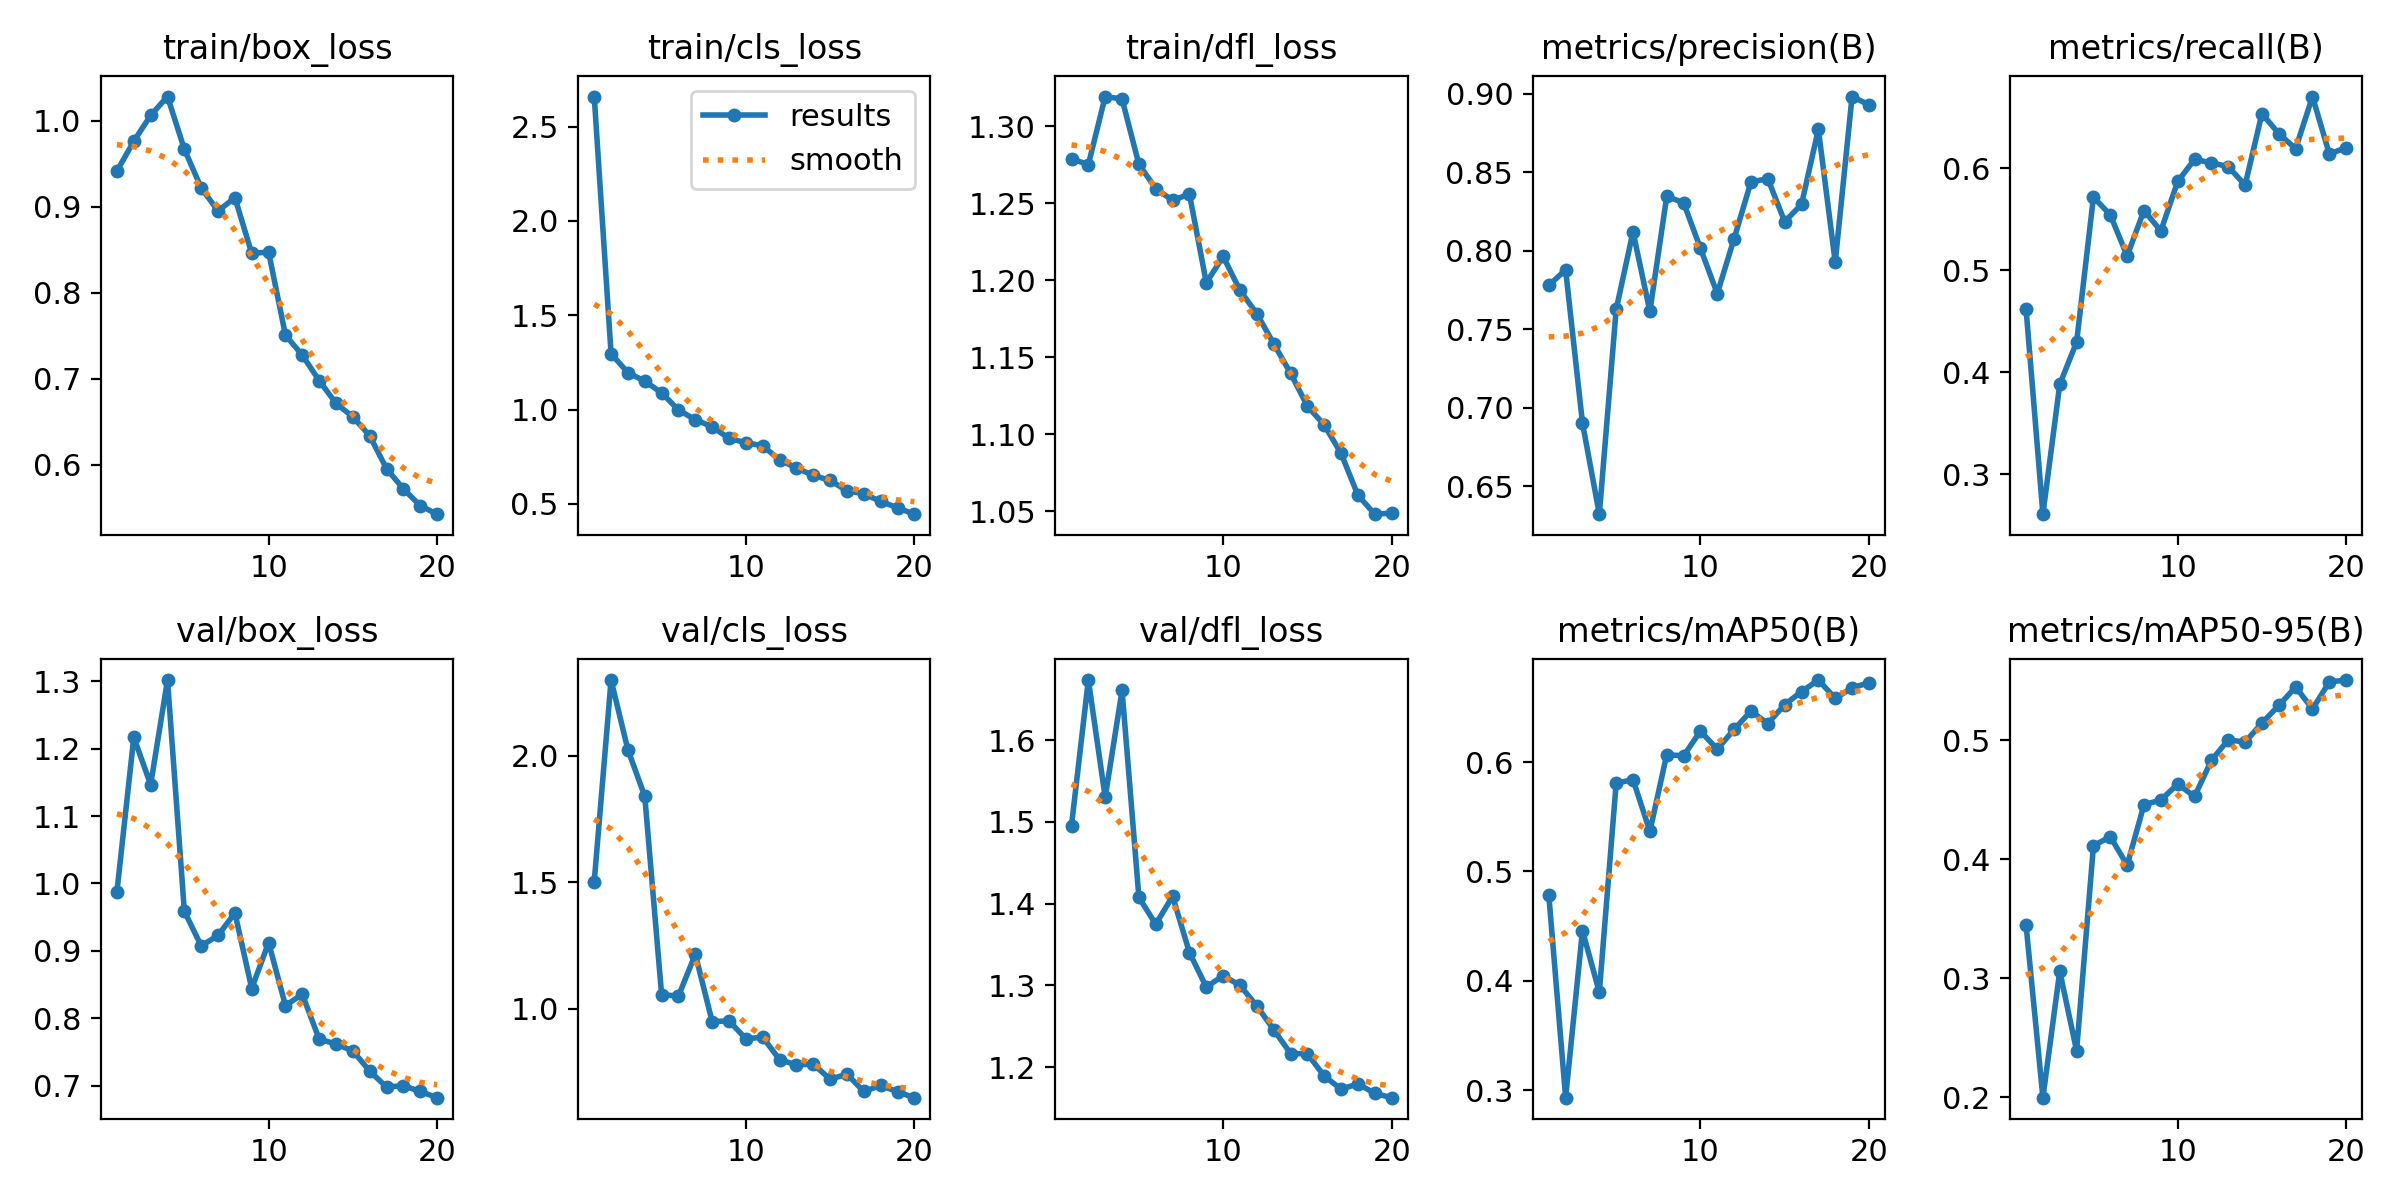

In [ ]:
Image('/content/runs/detect/train3/results.png')

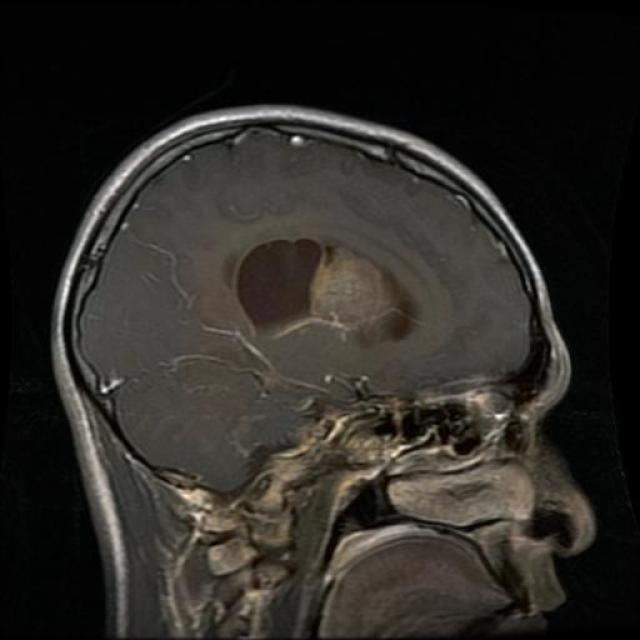

In [ ]:
Image('/content/Tumor-Detection-8/valid/images/glioma_1022_jpg.rf.ab6956aa8c8a25f994539c5cf6227064.jpg')



image 1/1 /content/brain_tumar2.jpeg: 640x544 1 glioma, 1 meningioma, 17.8ms
Speed: 2.7ms preprocess, 17.8ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 544)
Results saved to /content/runs/detect/predict5


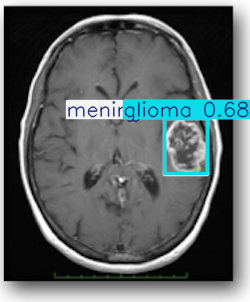

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO("/content/runs/detect/train3/weights/best.pt")

# Perform object detection on an image
results = model("/content/brain_tumar2.jpeg", save=True)
results[0].show()

In [ ]:
for res in results:
  box = res.boxes
  print(box)

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([1., 2.], device='cuda:0')
conf: tensor([0.6806, 0.3891], device='cuda:0')
data: tensor([[164.4986, 118.7502, 207.1250, 173.8974,   0.6806,   1.0000],
        [164.7651, 118.9063, 207.4391, 174.3169,   0.3891,   2.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (302, 250)
shape: torch.Size([2, 6])
xywh: tensor([[185.8118, 146.3238,  42.6265,  55.1472],
        [186.1021, 146.6116,  42.6740,  55.4105]], device='cuda:0')
xywhn: tensor([[0.7432, 0.4845, 0.1705, 0.1826],
        [0.7444, 0.4855, 0.1707, 0.1835]], device='cuda:0')
xyxy: tensor([[164.4986, 118.7502, 207.1250, 173.8974],
        [164.7651, 118.9063, 207.4391, 174.3169]], device='cuda:0')
xyxyn: tensor([[0.6580, 0.3932, 0.8285, 0.5758],
        [0.6591, 0.3937, 0.8298, 0.5772]], device='cuda:0')



image 1/1 /content/brain_tumar2.jpeg: 640x544 1 glioma, 1 meningioma, 16.0ms
Speed: 3.0ms preprocess, 16.0ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 544)
Results saved to /content/runs/detect/predict5


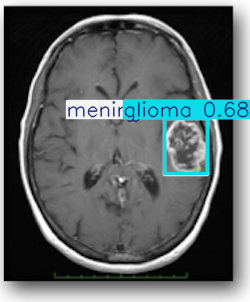

In [ ]:
from ultralytics import YOLO
from ultralytics import SAM

# Load a model
yolo_model = YOLO("/content/runs/detect/train3/weights/best.pt")

results = model("/content/brain_tumar2.jpeg", save=True)

sam_model = SAM("sam_b.pt")

results[0].show()

In [ ]:
for res in results:
  class_id = res.boxes.cls.int().tolist()
  if len(class_id):
    box = res.boxes.xyxy
    sam_result = sam_model(res.orig_img,bboxes=box,save=True)

  #print(class_id)


0: 1024x1024 1 0, 1 1, 601.1ms
Speed: 10.7ms preprocess, 601.1ms inference, 23.2ms postprocess per image at shape (1, 3, 1024, 1024)
Results saved to /content/runs/segment/predict


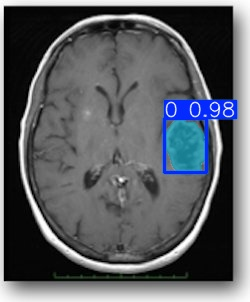

In [ ]:
Image('/content/runs/segment/predict/image0.jpg')

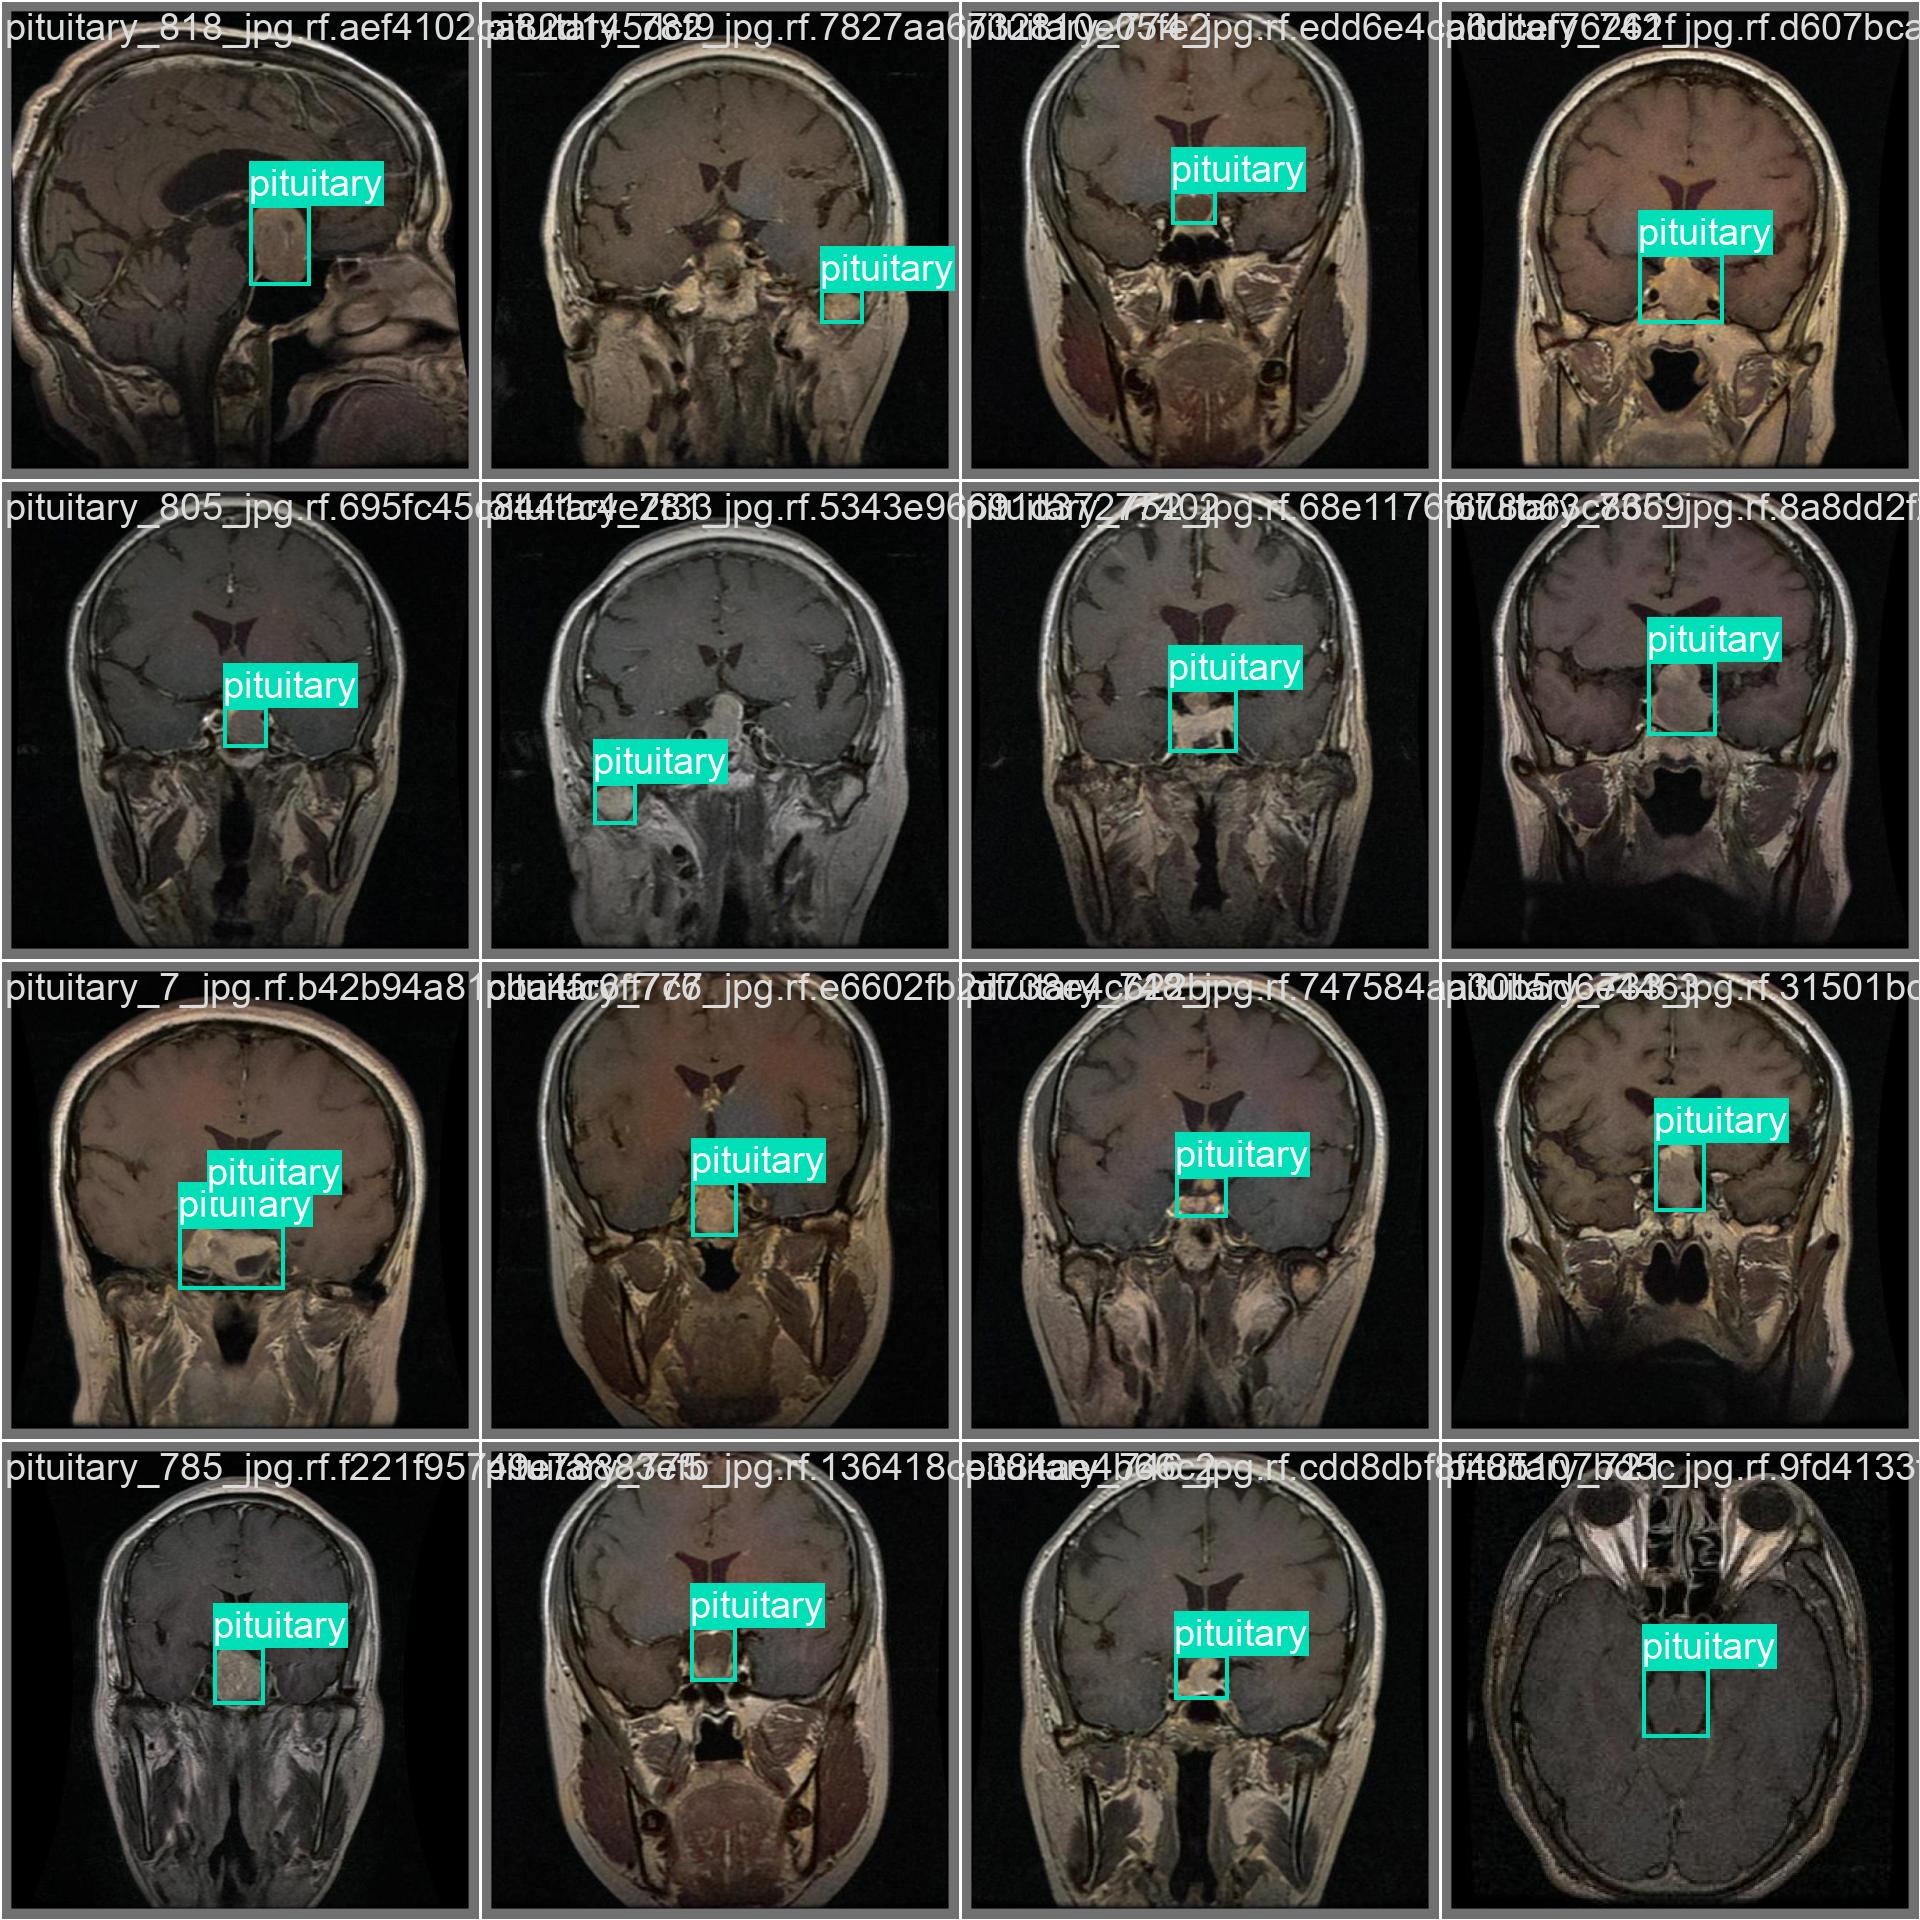

In [ ]:
Image('/content/runs/detect/train3/val_batch0_labels.jpg')

In [ ]:
result = model("/content/runs/detect/train3/val_batch0_labels.jpg", save=True)



image 1/1 /content/runs/detect/train3/val_batch0_labels.jpg: 640x640 (no detections), 15.7ms
Speed: 3.8ms preprocess, 15.7ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict5


In [ ]:
for res in result:
  class_id = res.boxes.cls.int().tolist()
  if len(class_id):
    box = res.boxes.xyxy
    sam_result = sam_model(res.orig_img,bboxes=box,save=True)

  #print(class_id)